Trisomy

In [2]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

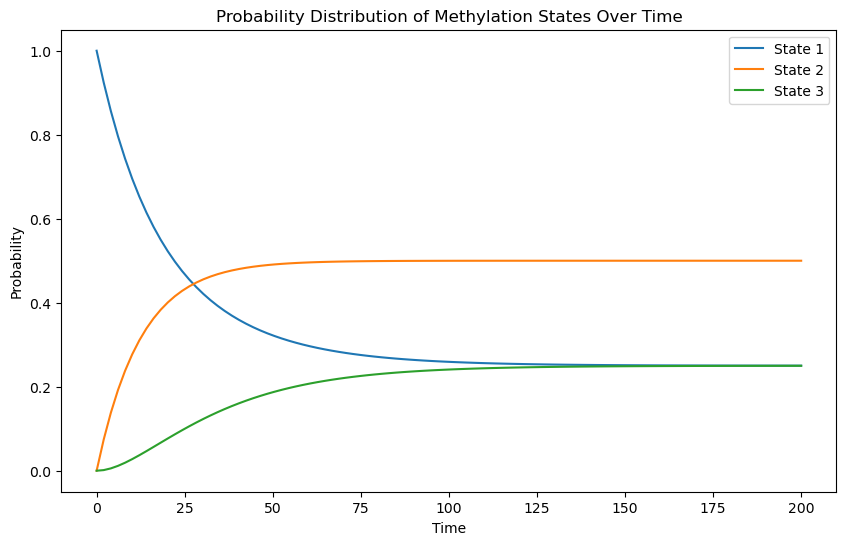

In [47]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

initial_state = np.array([1, 0, 0])  
mu = 0.02                          
gamma = 0.02                 
time_points = np.linspace(0, 200, 100)  

RateMatrix = np.array([[-2*gamma, mu, 0], 
                            [2*gamma, -(gamma + mu), 2*mu], 
                            [0, gamma, -2*mu]])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates) 

plt.figure(figsize=(10, 6))
for state in range(3):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()


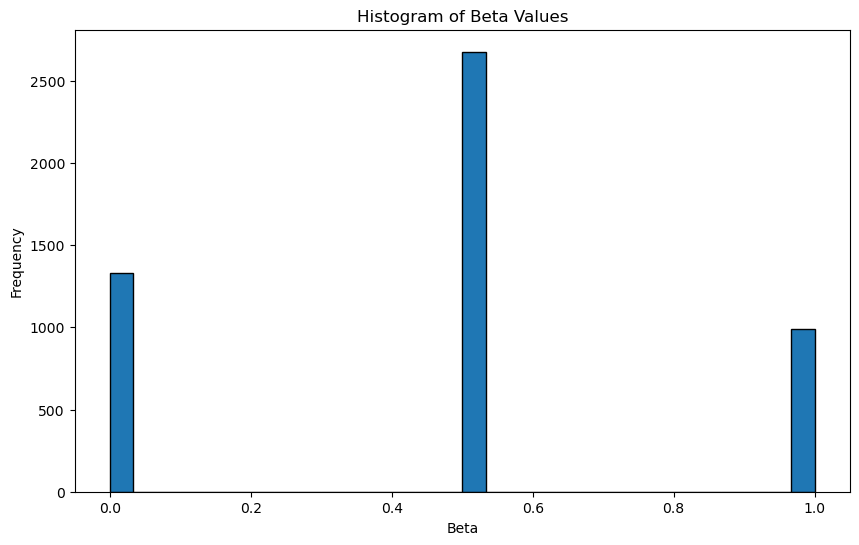

In [45]:
def state_simulation(initial_state, mu, gamma):
    rng = np.random.default_rng()
    m,k,w = initial_state
    dt=1

    p_m_to_k = 2 * gamma * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_w = mu * dt if k == 1 else 0      
    p_w_to_k = 2 * mu * dt if w == 1 else 0    

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, w = 0, 1, 0  

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, w = 1, 0, 0  
            
        elif rng.random() < p_k_to_w:
            m, k, w = 0, 0, 1  

    elif w == 1:
        if rng.random() < p_w_to_k:
            m, k, w = 0, 1, 0  

    return [m, k, w]

x = []

def run_simulation(initial_state, mu, gamma, num_iterations=5000):
    current_state = initial_state
    for _ in range(num_iterations):
        current_state = state_simulation(current_state, mu, gamma)  
        x.append(current_state)  

    return x

mu = 0.02
gamma = 0.02
initial_state = [1, 0, 0]  

final_states = run_simulation(initial_state, mu, gamma)


m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

w_list = []
w_vals = [subarray[2] for subarray in x]
w_list.append([])


beta_vals = [(k + 2*m) / 2 for m, k in zip(m_vals, k_vals)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()


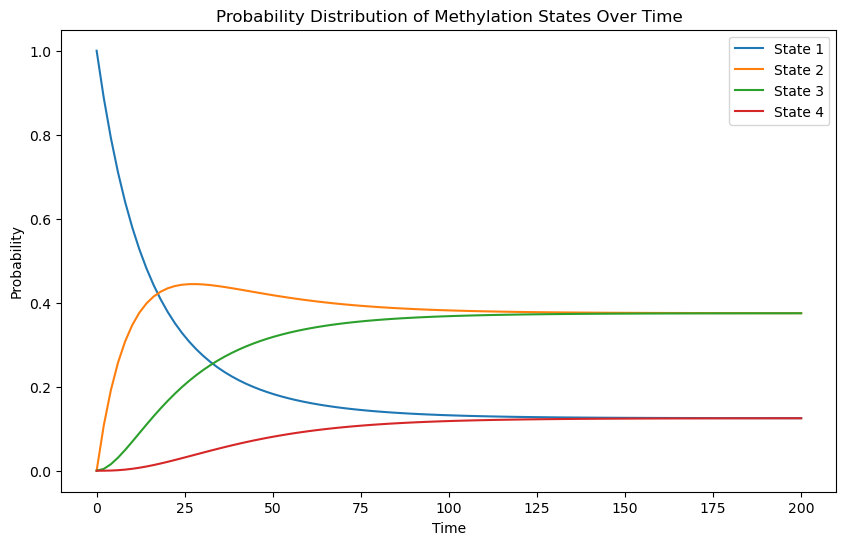

In [14]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

initial_state = np.array([1, 0, 0, 0])  
mu = 0.02                          
gamma = 0.02                 
time_points = np.linspace(0, 200, 100)  


RateMatrix = np.array([[-3*mu, gamma, 0, 0], 
                            [3*mu, -(gamma+2*mu), 2*gamma, 0], 
                            [0, 2*mu, -(2*gamma+mu), 3*gamma],
                            [0, 0, mu, -3*gamma]])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates) 

plt.figure(figsize=(10, 6))
for state in range(4):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()


Tetraploidy

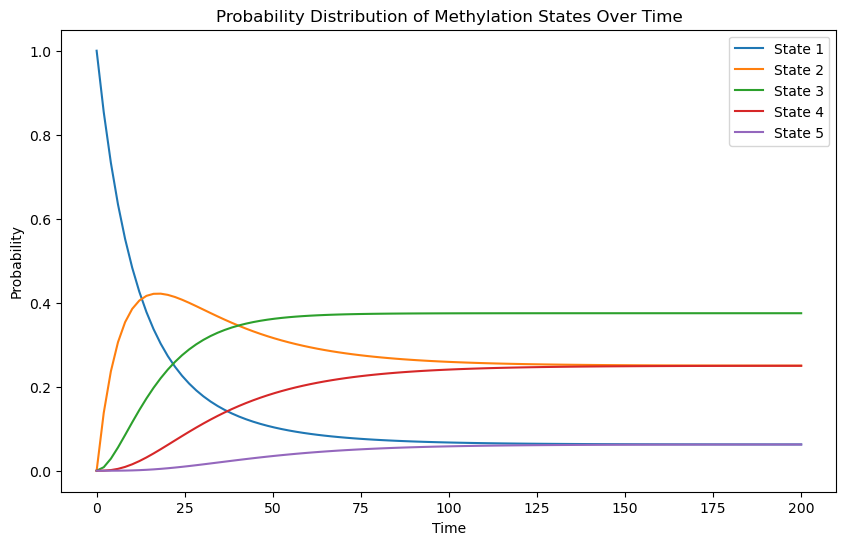

In [40]:
initial_state = np.array([1, 0, 0, 0, 0])  
mu = 0.02             #methylation rate            
gamma = 0.02          #demethylation rate 
time_points = np.linspace(0, 200, 100)   


RateMatrix = np.array([
    [-4*mu, gamma, 0, 0, 0],                
    [4*mu, -(3 * mu + gamma), 2 * gamma, 0, 0], 
    [0, 3 * mu, -(2 * mu + 2*gamma), 3*gamma, 0], 
    [0, 0, 2*mu, -(3*gamma+mu), 4*gamma],
    [0, 0, 0, mu, -4*gamma]           
])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates) 

plt.figure(figsize=(10, 6))
for state in range(5):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()

Trisomy State simulationn

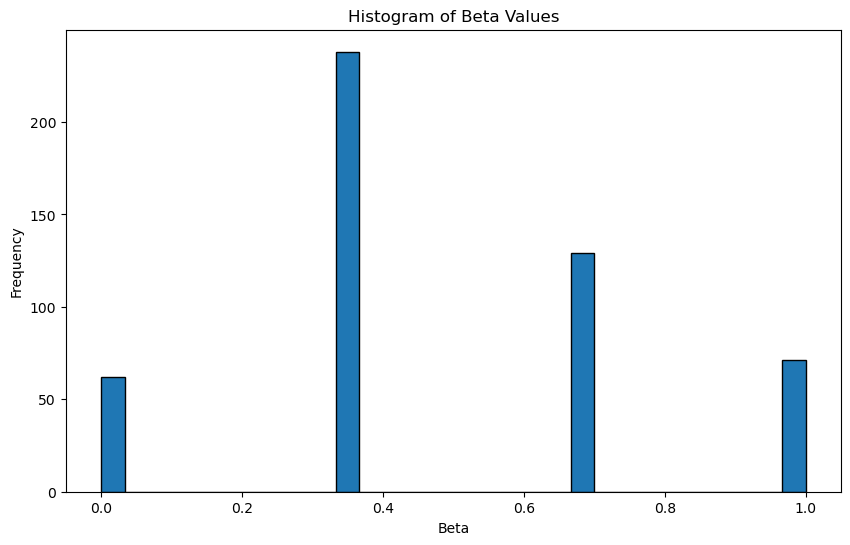

In [35]:
def state_simulation(initial_state, mu, gamma):
    rng = np.random.default_rng()
    m,k,d,w = initial_state
    dt=1

    p_m_to_k = 3*mu * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_d = 2*mu * dt if k == 1 else 0      
    p_d_to_k = 2*gamma * dt if d == 1 else 0    
    p_d_to_w = mu * dt if d == 1 else 0      
    p_w_to_d = 3*gamma * dt if w == 1 else 0    

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, d, w = 0, 1, 0, 0 

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, d, w = 1, 0, 0, 0
            
        elif rng.random() < p_k_to_d:
            m, k, d, w = 0, 0, 1, 0

    elif d == 1:
        if rng.random() < p_d_to_k:
            m, k, d, w = 0, 1, 0, 0
            
        elif rng.random() < p_d_to_w:
            m, k, d, w = 0, 0, 0, 1

    elif w == 1:
        if rng.random() < p_w_to_d:
            m, k, d, w = 0, 0, 1, 0

    return [m, k, d, w]

x = []

def run_simulation(initial_state, mu, gamma, num_iterations=500):
    current_state = initial_state
    for _ in range(num_iterations):
        current_state = state_simulation(current_state, mu, gamma)  
        x.append(current_state)  

    return x

mu = 0.02
gamma = 0.02
initial_state = [1, 0, 0, 0]  

final_states = run_simulation(initial_state, mu, gamma)

m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

d_list = []
d_vals = [subarray[2] for subarray in x]
d_list.append([])

w_list = []
w_vals = [subarray[3] for subarray in x]
w_list.append([])


beta_vals = [(k + 2 * d + 3 * w) / 3 for k, d, w in zip(k_vals, d_vals, w_vals)]

plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()

I think i need to modify this so that once the simulation has been run the the new state is saved and then input into the state simulation function as right now I think it is just repeating the transition from state m to state k

Tetraploidy state simulation

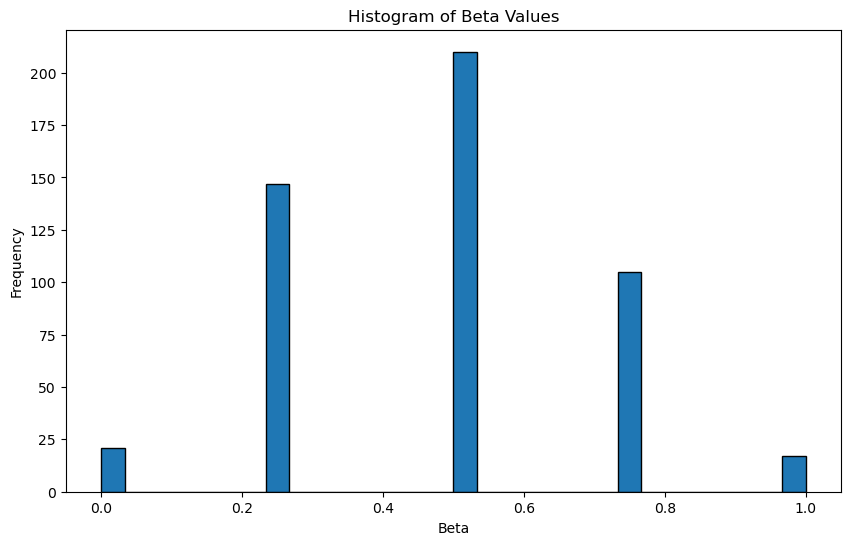

In [30]:
def state_simulation(initial_state, mu, gamma):
    rng = np.random.default_rng()
    m, k, d, v, w = initial_state
    dt=1
    p_m_to_k = 4*mu * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_d = 3*mu * dt if k == 1 else 0      
    p_d_to_k = 2*gamma * dt if d == 1 else 0    
    p_d_to_v = 2*mu * dt if d == 1 else 0      
    p_v_to_d = 3*gamma * dt if v == 1 else 0    
    p_v_to_w = mu * dt if v == 1 else 0      
    p_w_to_v = 4*gamma * dt if w == 1 else 0      

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, d, v, w = 0, 1, 0, 0, 0

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, d, v, w = 1, 0, 0, 0, 0
            
        elif rng.random() < p_k_to_d:
            m, k, d, v, w = 0, 0, 1, 0, 0

    elif d == 1:
        if rng.random() < p_d_to_k:
            m, k, d, v, w = 0, 1, 0, 0, 0
            
        elif rng.random() < p_d_to_v:
            m, k, d, v, w = 0, 0, 0, 1, 0
    
    elif v == 1:
        if rng.random() < p_v_to_d:
            m, k, d, v, w = 0, 0, 1, 0, 0
            
        elif rng.random() < p_v_to_w:
            m, k, d, v, w = 0, 0, 0, 0, 1

    elif w == 1:
        if rng.random() < p_w_to_v:
            m, k, d, v, w = 0, 0, 0, 1, 0

    return [m, k, d, v, w]

x = []

def run_simulation(initial_state, mu, gamma, num_iterations=500):
    current_state = initial_state
    for _ in range(num_iterations):
        current_state = state_simulation(current_state, mu, gamma)  
        x.append(current_state) 

    return x

mu = 0.02
gamma = 0.02
initial_state = [1, 0, 0, 0, 0] 

final_states = run_simulation(initial_state, mu, gamma)

m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

d_list = []
d_vals = [subarray[2] for subarray in x]
d_list.append([])

v_list = []
v_vals = [subarray[3] for subarray in x]
v_list.append([])

w_list = []
w_vals = [subarray[4] for subarray in x]
w_list.append([])


beta_vals = [(k + 2 * d + 3 * v + 4 * w) / 4 for k, d, v, w in zip(k_vals, d_vals, v_vals, w_vals)]

plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()